In [1]:
import tensorflow as tf

In [2]:
import os
import zipfile

local_zip = 'tmp/plant.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
base_dir = '/tmp/plant'

In [4]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [5]:
train_tomato_healthy_dir = os.path.join(train_dir, "Tomato_healthy")
train_tomato_earlyblight_dir = os.path.join(train_dir, 'Tomato_earlyblight')
train_tomato_spider_dir = os.path.join(train_dir, 'Tomato_Spider_mites_Two_spotted_spider_mite')
train_pepper_healthy_dir = os.path.join(train_dir, "Pepper__bell___healthy")
train_pepper_bacterialspot_dir = os.path.join(train_dir, "Pepper__bell___Bacterial_spot")

In [6]:
validation_tomato_healthy_dir = os.path.join(validation_dir, "Tomato_healthy")
validation_tomato_earlyblight_dir = os.path.join(validation_dir, 'Tomato_earlyblight')
validation_tomato_spider_dir = os.path.join(validation_dir, 'Tomato_Spider_mites_Two_spotted_spider_mite')
validation_pepper_healthy_dir = os.path.join(validation_dir, "Pepper__bell___healthy")
validation_pepper_bacterialspot_dir = os.path.join(validation_dir, "Pepper__bell___Bacterial_spot")


In [7]:
train_tomato_healthy_fnames = os.listdir( train_tomato_healthy_dir )
train_tomato_earlyblight_fnames = os.listdir( train_tomato_earlyblight_dir )
train_tomato_spider_fnames = os.listdir(train_tomato_spider_dir)
train_pepper_healthy_fnames = os.listdir( train_pepper_healthy_dir )
train_pepper_bacterialspots_fnames = os.listdir( train_pepper_bacterialspot_dir )

In [8]:
print(train_tomato_healthy_fnames[:1])
print(train_tomato_earlyblight_fnames[:1])
print(train_tomato_spider_fnames[:1])
print(train_pepper_healthy_fnames[:1])
print(train_pepper_bacterialspots_fnames[:1])

['9e2a71e5-2a59-4e62-9c6c-581fe9091a10___RS_HL 0132.JPG']
['cb0e04ea-9d44-4c3f-b528-d7aa32aa0b85___RS_Erly.B 7850.JPG']
['fa05ccd2-725d-4664-aaca-1c8b69d73b10___Com.G_SpM_FL 1505.JPG']
['ade83a82-f521-48d3-acde-24d5ad677350___JR_HL 7764.JPG']
['47fbd17d-c078-4465-8816-c675abd9c850___JR_B.Spot 3185.JPG']


In [9]:
print('total training healthy tomato images :', len(os.listdir(train_tomato_healthy_dir ) ))
print('total training infected tomato with early blight images :', len(os.listdir( train_tomato_earlyblight_dir ) ))
print('total training infected tomato with spider mites spot images :', len(os.listdir(train_tomato_spider_dir)))
print('total training healthy pepper images :', len(os.listdir( train_pepper_healthy_dir ) ))
print('total training infected pepper with bacterial spots images :', len(os.listdir( train_pepper_bacterialspot_dir ) ))

total training healthy tomato images : 1591
total training infected tomato with early blight images : 1000
total training infected tomato with spider mites spot images : 1676
total training healthy pepper images : 1478
total training infected pepper with bacterial spots images : 997


In [10]:
print('total validation healthy tomato images :', len(os.listdir(validation_tomato_healthy_dir ) ))
print('total validation infected tomato with early blight images :', len(os.listdir( validation_tomato_earlyblight_dir ) ))
print('total training infected tomato with spider mites spot images :', len(os.listdir(validation_tomato_spider_dir)))
print('total validation healthy pepper images :', len(os.listdir( validation_pepper_healthy_dir ) ))
print('total validation infected pepper with bacterial spots images :', len(os.listdir( validation_pepper_bacterialspot_dir) ))

total validation healthy tomato images : 1502
total validation infected tomato with early blight images : 917
total training infected tomato with spider mites spot images : 1587
total validation healthy pepper images : 1383
total validation infected pepper with bacterial spots images : 902


In [11]:
from tensorflow import keras

In [12]:
model=keras.models.Sequential([
keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(256,256,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(16,(3,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(32,(3,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(64,(3,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Conv2D(128,(3,3)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Flatten(),
keras.layers.Dropout(0.3),
keras.layers.Dense(units=1024,activation='relu'),
keras.layers.Dense(units=512,activation='relu'),
keras.layers.Dense(units=5,activation='softmax')])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 16)      1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        1

In [14]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=0.4,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    shuffle=True,
    class_mode='categorical',
    target_size=(256,256))

Found 6742 images belonging to 5 classes.


In [18]:
validation_generator= test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='categorical',
    shuffle=False,
    target_size=(256,256)
)

Found 6286 images belonging to 5 classes.


In [19]:
history = model.fit_generator(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    steps_per_epoch=100,
    validation_steps=50,
    verbose=2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 - 46s - loss: 1.6549 - accuracy: 0.3269 - val_loss: 2.0840 - val_accuracy: 0.0670
Epoch 2/10
100/100 - 58s - loss: 1.2383 - accuracy: 0.5345 - val_loss: 2.1971 - val_accuracy: 0.2120
Epoch 3/10
100/100 - 55s - loss: 0.9515 - accuracy: 0.6413 - val_loss: 1.0859 - val_accuracy: 0.5820
Epoch 4/10
100/100 - 57s - loss: 0.7952 - accuracy: 0.7110 - val_loss: 0.7815 - val_accuracy: 0.7540
Epoch 5/10
100/100 - 57s - loss: 0.7508 - accuracy: 0.7270 - val_loss: 0.4675 - val_accuracy: 0.8460
Epoch 6/10
100/100 - 63s - loss: 0.6408 - accuracy: 0.7685 - val_loss: 0.2514 - val_accuracy: 0.9220
Epoch 7/10
100/100 - 61s - loss: 0.6159 - accuracy: 0.7625 - val_loss: 0.6954 - val_accuracy: 0.7390
Epoch 8/10
100/100 - 60s - loss: 0.5863 - accuracy: 0.8015 - val_loss: 0.6383 - val_accuracy: 0.7360
Epoch 9/10
100/100 - 61s - loss: 0.5479 - accuracy: 0.8153 - val_loss: 0.3729 - val_accuracy: 0.9070
Epoch 10/10
100

In [20]:
print("Model Trained successfully")

Model Trained successfully


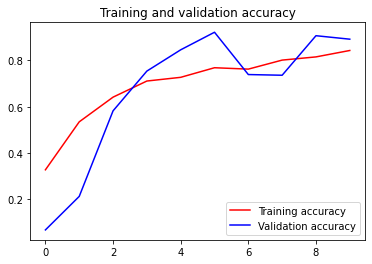

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [22]:
model.save('PDDV1.hdf5')